In [9]:
%autosave 10

Autosaving every 10 seconds


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [11]:
df = pd.read_csv('D:\Technocolab\Mini Project 2\Task 1\cleaned_data.csv')

In [12]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [13]:
df['LIMIT_BAL']

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
26659    220000
26660    150000
26661     30000
26662     80000
26663     50000
Name: LIMIT_BAL, Length: 26664, dtype: int64

In [14]:
df['default payment next month']

0        1
1        1
2        0
3        0
4        0
        ..
26659    0
26660    0
26661    1
26662    1
26663    1
Name: default payment next month, Length: 26664, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=14)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [36]:
model = LogisticRegression(C=1e40, solver='liblinear')

In [38]:
model.fit(X_train, y_train)

LogisticRegression(C=1e+40, solver='liblinear')

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [39]:
y_pred = model.predict_proba(X_test)[:,1]
y_pred

array([0.20489723, 0.30712863, 0.44932597, ..., 0.17373889, 0.26561761,
       0.03261239])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [40]:
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve
roc_auc_score(y_test, y_pred)

0.6190287059219097

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve for Logistic Regression')

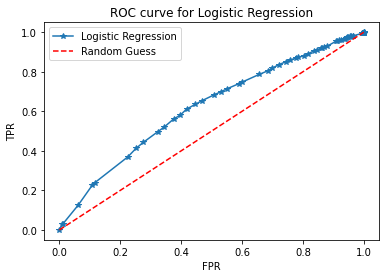

In [42]:
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr,'*-')
plt.plot([0,1],[0,1],'r--')
plt.legend(['Logistic Regression','Random Guess'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Logistic Regression')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [43]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


(0.0, 1.0)

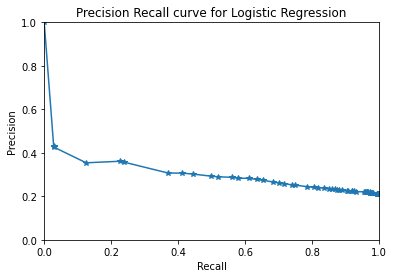

In [45]:
plt.plot(recall, precision,'*-')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision Recall curve for Logistic Regression')
plt.xlim([0,1])
plt.ylim([0,1])

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [46]:
from sklearn.metrics import auc
auc(recall, precision)

0.3083224982138224

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [47]:
train_predictions = model.predict_proba(X_train)
roc_auc_score(y_train, train_predictions[:,1])

0.6186313902399415

    How is this different, conceptually and quantitatively, from your earlier calculation?


The AUC obtained from test data is : 0.6190287059219097

The AUC obtained from train data is : 0.6186313902399415

Higher the AUC, better is the model. As we can see that the AUC of the test data is more than that of the train data. The difference is not very much which means that the model is not overfitting nor underfitting. The model has variance which makes it possible for more score than train.  